In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
mob = pd.read_csv('mobiles.csv')
mob

,Product Name,Price,Original Prices,Discount rates,Ratings
0,"Realme 6 (Comet Blue, 128 GB)","16,999",NaN,Nan,4.4
1,"Redmi Note 8 Pro (Electric Blue, 128 GB)","17,785","17,999",1% off,4.5
2,"POCO X2 (Atlantis Blue, 128 GB)","18,499","18,999",2% off,4.5
3,"POCO X2 (Matrix Purple, 128 GB)","18,499","18,999",2% off,4.5
4,"Vivo Z1Pro (Sonic Black, 64 GB)","13,990","15,990",12% off,4.5
...,...,...,...,...,...
595,Karbonn KX26,999,NaN,Nan,3.8
596,Gfive U873,599,NaN,Nan,3.7
597,Zen Zen M72 Max,"1,270",NaN,Nan,3.8
598,Karbonn K324N,"1,045",NaN,Nan,3.8


In [56]:
mob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Name     600 non-null    object 
 1   Price            600 non-null    object 
 2   Original Prices  342 non-null    object 
 3   Discount rates   600 non-null    object 
 4   Ratings          587 non-null    float64
dtypes: float64(1), object(4)
memory usage: 23.6+ KB


In [57]:
mob.shape

(600, 5)

In [58]:
mob_res=mob.dropna().reset_index(drop=True)
mob_res

,Product Name,Price,Original Prices,Discount rates,Ratings
0,"Redmi Note 8 Pro (Electric Blue, 128 GB)","17,785","17,999",1% off,4.5
1,"POCO X2 (Atlantis Blue, 128 GB)","18,499","18,999",2% off,4.5
2,"POCO X2 (Matrix Purple, 128 GB)","18,499","18,999",2% off,4.5
3,"Vivo Z1Pro (Sonic Black, 64 GB)","13,990","15,990",12% off,4.5
4,"Vivo Z1Pro (Sonic Black, 128 GB)","16,990","20,990",19% off,4.5
...,...,...,...,...,...
327,Inovu A1s Combo of Two Mobiles,"1,156","2,178",46% off,3.3
328,Inovu A1s Combo of Two Mobiles,"1,156","2,178",46% off,3.3
329,Muphone M3000,849,899,5% off,3.6
330,Muphone M3000,849,899,5% off,3.6


In [59]:
mob_res.isna().any()

Product Name       False
Price              False
Original Prices    False
Discount rates     False
Ratings            False
dtype: bool

In [60]:
mob_res['Product Name'].str.split('(')

0      [Redmi Note 8 Pro , Electric Blue, 128 GB)]
1               [POCO X2 , Atlantis Blue, 128 GB)]
2               [POCO X2 , Matrix Purple, 128 GB)]
3               [Vivo Z1Pro , Sonic Black, 64 GB)]
4              [Vivo Z1Pro , Sonic Black, 128 GB)]
                          ...                     
327               [Inovu A1s Combo of Two Mobiles]
328               [Inovu A1s Combo of Two Mobiles]
329                                [Muphone M3000]
330                                [Muphone M3000]
331                                [Muphone M3000]
Name: Product Name, Length: 332, dtype: object

In [61]:
mob_res['b&m'] = mob_res['Product Name'].str.split('(').str[0]
mob_res['Color']=mob_res['Product Name'].str.split('(').str[1].str.split(',').str[0]
mob_res['Storage']=mob_res['Product Name'].str.split('(').str[1].str.split(',').str[1].str.split(')').str[0]
mob_res[['Brand','Model']] = mob_res['b&m'].str.split(' ',n=1, expand=True)
mob_res = mob_res.drop(columns=['Product Name','b&m'])

mob_res['Storage']=mob_res['Storage'].str.replace('GB','')
mob_res['Price']=mob_res['Price'].str.replace(',','').astype(float)
mob_res['Original Prices']=mob_res['Original Prices'].str.replace(',','').astype(float)
mob_res['Discount rates']=mob_res['Discount rates'].str.replace('% off','').astype(float)

mob_res

,Price,Original Prices,Discount rates,Ratings,Color,Storage,Brand,Model
0,17785.0,17999.0,1.0,4.5,Electric Blue,128,Redmi,Note 8 Pro
1,18499.0,18999.0,2.0,4.5,Atlantis Blue,128,POCO,X2
2,18499.0,18999.0,2.0,4.5,Matrix Purple,128,POCO,X2
3,13990.0,15990.0,12.0,4.5,Sonic Black,64,Vivo,Z1Pro
4,16990.0,20990.0,19.0,4.5,Sonic Black,128,Vivo,Z1Pro
...,...,...,...,...,...,...,...,...
327,1156.0,2178.0,46.0,3.3,NaN,NaN,Inovu,A1s Combo of Two Mobiles
328,1156.0,2178.0,46.0,3.3,NaN,NaN,Inovu,A1s Combo of Two Mobiles
329,849.0,899.0,5.0,3.6,NaN,NaN,Muphone,M3000
330,849.0,899.0,5.0,3.6,NaN,NaN,Muphone,M3000


In [62]:
mob_res=mob_res[['Brand','Model','Color','Storage','Price','Original Prices','Discount rates','Ratings']]
mob_res

,Brand,Model,Color,Storage,Price,Original Prices,Discount rates,Ratings
0,Redmi,Note 8 Pro,Electric Blue,128,17785.0,17999.0,1.0,4.5
1,POCO,X2,Atlantis Blue,128,18499.0,18999.0,2.0,4.5
2,POCO,X2,Matrix Purple,128,18499.0,18999.0,2.0,4.5
3,Vivo,Z1Pro,Sonic Black,64,13990.0,15990.0,12.0,4.5
4,Vivo,Z1Pro,Sonic Black,128,16990.0,20990.0,19.0,4.5
...,...,...,...,...,...,...,...,...
327,Inovu,A1s Combo of Two Mobiles,NaN,NaN,1156.0,2178.0,46.0,3.3
328,Inovu,A1s Combo of Two Mobiles,NaN,NaN,1156.0,2178.0,46.0,3.3
329,Muphone,M3000,NaN,NaN,849.0,899.0,5.0,3.6
330,Muphone,M3000,NaN,NaN,849.0,899.0,5.0,3.6


In [63]:
mob_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            332 non-null    object 
 1   Model            332 non-null    object 
 2   Color            237 non-null    object 
 3   Storage          235 non-null    object 
 4   Price            332 non-null    float64
 5   Original Prices  332 non-null    float64
 6   Discount rates   325 non-null    float64
 7   Ratings          332 non-null    float64
dtypes: float64(4), object(4)
memory usage: 20.9+ KB


In [64]:
mob_res = mob_res.dropna().reset_index(drop=True)
mob_res

,Brand,Model,Color,Storage,Price,Original Prices,Discount rates,Ratings
0,Redmi,Note 8 Pro,Electric Blue,128,17785.0,17999.0,1.0,4.5
1,POCO,X2,Atlantis Blue,128,18499.0,18999.0,2.0,4.5
2,POCO,X2,Matrix Purple,128,18499.0,18999.0,2.0,4.5
3,Vivo,Z1Pro,Sonic Black,64,13990.0,15990.0,12.0,4.5
4,Vivo,Z1Pro,Sonic Black,128,16990.0,20990.0,19.0,4.5
...,...,...,...,...,...,...,...,...
227,Vivo,V11 Pro,Starry Night Black,64,15799.0,28990.0,45.0,4.5
228,Asus,ZenFone Max M2,Black,64,8999.0,14999.0,40.0,4.3
229,Vivo,V15 Pro,Ruby Red,128,21099.0,32990.0,36.0,4.5
230,Honor,10 Lite,Midnight Black,64,11599.0,16999.0,31.0,4.4


In [65]:
mob_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            232 non-null    object 
 1   Model            232 non-null    object 
 2   Color            232 non-null    object 
 3   Storage          232 non-null    object 
 4   Price            232 non-null    float64
 5   Original Prices  232 non-null    float64
 6   Discount rates   232 non-null    float64
 7   Ratings          232 non-null    float64
dtypes: float64(4), object(4)
memory usage: 14.6+ KB


In [66]:
mob_res.shape

(232, 8)

In [67]:
mob_res.dtypes

Brand               object
Model               object
Color               object
Storage             object
Price              float64
Original Prices    float64
Discount rates     float64
Ratings            float64
dtype: object

In [68]:
mob_res['Storage'].astype(int)

ValueError: invalid literal for int() with base 10: ' White'

In [72]:
mob_res[mob_res['Storage'].str.contains('White')]

,Brand,Model,Color,Storage,Price,Original Prices,Discount rates,Ratings
205,Nokia,6.1,Iron,White,8999.0,17979.0,49.0,4.2


In [73]:
mob_res=mob_res.drop(205).reset_index(drop=True)
mob_res['Storage']=mob_res['Storage'].astype(int)
mob_res

,Brand,Model,Color,Storage,Price,Original Prices,Discount rates,Ratings
0,Redmi,Note 8 Pro,Electric Blue,128,17785.0,17999.0,1.0,4.5
1,POCO,X2,Atlantis Blue,128,18499.0,18999.0,2.0,4.5
2,POCO,X2,Matrix Purple,128,18499.0,18999.0,2.0,4.5
3,Vivo,Z1Pro,Sonic Black,64,13990.0,15990.0,12.0,4.5
4,Vivo,Z1Pro,Sonic Black,128,16990.0,20990.0,19.0,4.5
...,...,...,...,...,...,...,...,...
226,Vivo,V11 Pro,Starry Night Black,64,15799.0,28990.0,45.0,4.5
227,Asus,ZenFone Max M2,Black,64,8999.0,14999.0,40.0,4.3
228,Vivo,V15 Pro,Ruby Red,128,21099.0,32990.0,36.0,4.5
229,Honor,10 Lite,Midnight Black,64,11599.0,16999.0,31.0,4.4


In [74]:
mob_res.dtypes

Brand               object
Model               object
Color               object
Storage              int32
Price              float64
Original Prices    float64
Discount rates     float64
Ratings            float64
dtype: object

In [75]:
mob_res.describe()

,Storage,Price,Original Prices,Discount rates,Ratings
count,231.000000,231.000000,231.000000,231.000000,231.000000
mean,76.952381,15144.909091,18810.584416,19.064935,4.359307
std,45.951888,9551.893685,11919.705773,13.836628,0.228011
min,8.000000,3200.000000,4799.000000,1.000000,2.700000
25%,32.000000,8499.000000,11744.500000,7.000000,4.300000
50%,64.000000,12990.000000,15990.000000,15.000000,4.400000
75%,128.000000,17990.000000,20990.000000,28.500000,4.500000
max,256.000000,62999.000000,89900.000000,75.000000,4.700000


In [76]:
mob_res.select_dtypes(include='number').corr()

,Storage,Price,Original Prices,Discount rates,Ratings
Storage,1.000000,0.507140,0.414853,-0.314735,0.407394
Price,0.507140,1.000000,0.919787,-0.332437,0.483796
Original Prices,0.414853,0.919787,1.000000,-0.005008,0.368760
Discount rates,-0.314735,-0.332437,-0.005008,1.000000,-0.451181
Ratings,0.407394,0.483796,0.368760,-0.451181,1.000000


In [119]:
def plot_scatter(mob_res):
    
    fig,ax = plt.subplots(figsize=(5,3))
    
    ax.scatter(mob_res['Price'],mob_res['Ratings'],marker='o',c='darkgreen',alpha=0.5)
    ax.set_xlabel('Prices')
    ax.set_ylabel('Ratings')
    ax.set_title('Price Vs. Ratings',fontweight='bold',pad=20,color='darkgreen')
    ax.grid(color='gray', alpha=0.4)
    plt.legend(['Rating'], loc= 'lower right')
    plt.show()

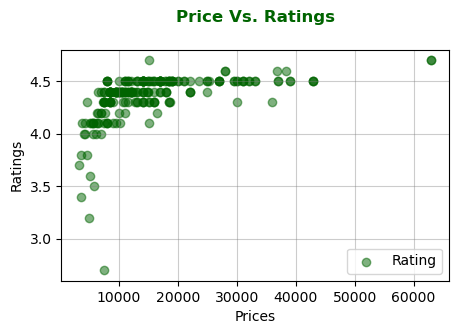

In [120]:
plot_scatter(mob_res)

In [113]:
def pie_chart():
    brands=['Apple','Redmi','POCO','Realme','Google','OPPO']
    mob_brands=mob_res[mob_res['Brand'].isin(brands)]
    
    average_ratings=mob_brands.groupby('Brand')['Discount rates'].mean()
    brands=average_ratings.index
    avg_ratings=average_ratings.values
    
    explode= [0.1 if i==avg_ratings.argmax() else 0 for i in range(len(avg_ratings))]
    fig,ax=plt.subplots(figsize=(5,3))
    ax.pie(avg_ratings,autopct='%1.1f%%',startangle=140,explode= explode,shadow=True)
    plt.legend(brands,title='Brands:',loc='center',bbox_to_anchor=(1,1))
    plt.axis('equal')
    plt.title('Average Discounts by Brand',fontweight='bold',pad=20,c='darkred')
    plt.show()

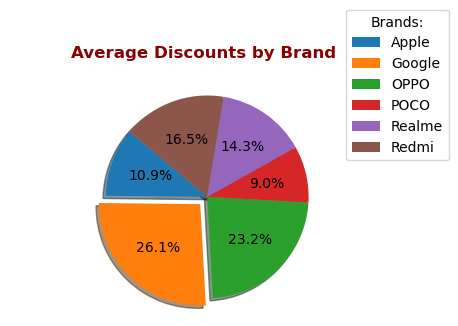

In [114]:
pie_chart()

In [121]:
def plot_heatmap():
    corr_matrix=mob_res.select_dtypes(include='number').corr()
    plt.figure(figsize=(5,3))
    
    sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm',square='True')
    plt.title('Correlation Heatmap',fontweight='bold', color="darkred",pad=20)
    plt.show()

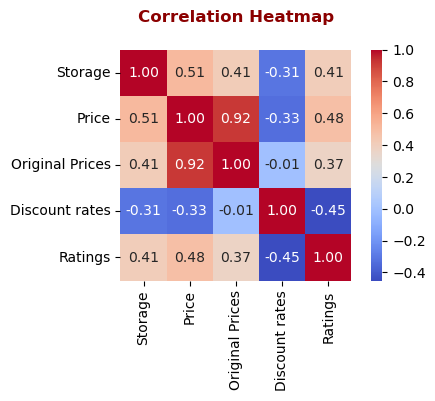

In [122]:
plot_heatmap()